# CHAPTER5 순환신경망(RNN)
##### 피드포워드(feed forward) 신경망
- 흐름이 단방향
- 시계열 데이터의 성질(패턴)을 충분히 학습할 수 없음

__순환 신경망(Recurrent Neural Network, RNN)의 등장__

## 5.1 확률과 언어 모델
##### 5.1.1 word2vec 을 확률 관점에서 바라보다
CBOW(Continuous bag-of-words)모델 <br>
- CBOW 모델의 학습
    - 손실함수(말뭉치 전체의 손실함수의 총합)을 최소화하는 가중치 매개변수를 찾는다
- 맥락 안의 단어 순서가 무시된다는 한계가 있다.
    - 말뭉치 : $w_1, w_2, w_3, ..., w_t$
    
> - 맥락을 좌우 대칭으로 생각 <br>
> - $t$번째 단어를 __타깃__으로 그 전후 단어($t-1$)번째 단어와 ($t+1$)번째 단어를 __맥락__으로 취급

![](img/fig-5-1.png)

$w(t-1)$과 $w(t+1)$이 주어졌을 때 타깃이 $w_t$가 될 확률을 수식으로 표현한다면
$$
P(w_t|w_{t-1}, w_{t+1})
$$

##### 맥락을 왼쪽 윈도우만으로 한정
![](img/fig-5-1.png)

$w_{t-2}$과 $w_{t-1}$이 주어졌을 때 타깃이 $w_t$가 될 확률(CBOW모델이 출력할 확률)을 수식으로 표현하면

$$
P(w_t|w_{t-2}, w_{t-1})
$$

CBOW 모델이 다루는 손실 함수

$$
L = -logP(w_t|w_{t-2}, w_{t-1})
$$

##### 5.1.2언어 모델(Language Model)
단어 나열에 확률을 부여 <br>
특정한 단어의 시퀀스에 대해 그 시퀀스가 일어날 가능성이 어느정도인지(얼마나 자연스러운 단어 순서인지)를 확률로 평가한다. <br>
- 언어 모델의 사용
- 기계 번역과 음성 인식
- 새로운 문장을 생성

$w_1, ... , w_m$ 이라는 $m$개의 단어로 된 문장이 있을 때 <br>
$w_1, ... , w_m$ 순서로 출현할 확률 $P(w_1, ... , w_m)$ <br>
(여러 사건이 동시에 일어날 확률이므로 동시확률이라고 한다.)

![](img/e-5-4.png) 
__동시확률은 사후 확률의 총 곱으로 나타낼 수 있다.__ <br>

_이 사후 확률은 타깃 단어보다 왼쪽에 있는 단어를 맥락(조건)으로 했을 때의 확률이라는 것에 주목해야 한다._

![](img/fig-5-3.png)

____확률의 곱셈정리___
$$
P(A,B) = P(A|B)P(B)
$$

A, B가 모두 일어날 확률 $P(A,B)$는 $B$가 일어날 확률 P(B)와 B가 일어난 후 A가 일어날 확률 $P(A|B)$를 곱한 값과 같다.

![](img/e-5-6.png)
![](img/e-5-7.png)

##### 5.1.3 CBOW 모델을 언어 모델로
- word2vec의 CBOW 모델을 언어 모델에 적용하려면 맥락의 크기를 특정 값으로 한정하여 근사적으로 나타낼 수 있다.
- 맥락의 크기는 임의 길이로 설정할 수 있지만, 결국 특정 길이로 고정된다.
    - 예를 들어 __왼쪽 10개의 단어를 맥락으로 CBOW 모델을 만든다고 하면 그 맥락보다 더 왼쪽에 있는 단어의 정보는 무시된다.__
- __CBOW모델의 맥락 크기를 키울 수는 있으나, 맥락 안의 단어 순서가 무시된다는 한계가 있다.__
- 맥락의 단어 순서를 고려하기 위해 맥락의 단어 벡터를 은닉층에서 연결(concatenate)하는 방식을 생각할 수 있으나, 맥락의 크기에 비례해 가중치 매개변수가 늘어난다는 문제가 발생한다.

> 그래서 순환신경망 즉 RNN이 등장하게 되었는데, RNN은 맥락이 아무리 길더라도 맥락의 정보를 기억하는 메커니즘을 갖추고 있기에, 아무리 긴 시계열 데이터에도 대응할 수 있다.

## RNN이란?

##### 5.2.1 순환하는 신경망
순환하기 위해서는 __닫힌 경로__가 필요하다. <br>
__닫힌 경로__혹은 __순환하는 경로__가 존재해야 데이터가 같은 장소를 반복해 왕래할 수 있고, 데이터가 순환하면서 과거의 정보를 기억하는 동시에 최신 데이터로 갱신 될 수 있다.
![](img/fig-5-6.png)

__t : 시각__ <br>
시계열 데이터($x_0, x_1, ...x_t, ...)$가 RNN 계층에 입력되고 이에 대응해 $(h_0, h_1, ..., h_t, ...)$가 출력된다. <br>
각 시각에 입력되는 $x_t$를 벡터라고 가정했을 때 문장(단어 순서)을 다루는 경우를 예로 든다면 각 단어의 분산 표현(단어 벡터)이 $x_t$가 되며, 이 분산표현이 순서대로 하나씩 RNN계층에 입력된다.

##### 5.2.2 순환구조 펼치기
![](img/fig-5-8.png)

RNN계층의 순환 구조를 펼침으로써 오른쪽으로 성장하는 긴 신경망으로 변신<br>
피드포워드 신경망(데이터가 한 방향으로만 흐른다)과 같은 구조잊미나, 위 그림에서는 다수의 RNN계층 모두가 실제로는 '같은 계층'인 것이 지금까지의 신경망과는 다른 점이다. <br>

각 시각의 RNN계층은 그 계층으로의 입력과 1개전의 RNN 계층으로부터의 출력을 받는데, 이 두 정보를 바탕으로 현 시각의 출력을 계산한다. <br>

$$
h_t = tanh(h_{t-1}W_h + x_tW_x + b)
$$


- $W_x$ : 입력 $x$를 출력 $h$로 변환하기 위한 가중치
- $w_H$ : 1개의 RNN 출력을 다음 시각의 출력으로 변환하기 위한 가중치
- $b$ : 편향
- $h_{t-1}, x_t$ : 행 벡터

$h_t$는 다른 계층을 향해 위쪽으로 출력되는 동시에 다음 시각의 RNN계층(자기 자신)을 향해 오른쪽으로도 출력된다. RNN의 출력 $h_t$는 은닉상태(hidden state) 혹은 은닉 상태 벡터(hidden state vector)라고 한다.

> RNN은 $h$라는 '상태'를 가지고 있으며, 위의 식의 형태로 갱신된다고 해석할 수 있다. <br>
> RNN계층을 '상태를 가지는 계층' 혹은 '메모리(기억력)가 있는 계층'이라고 한다.

##### 5.2.3 BPTT
![](img/fig-5-10.png)

순환 구조를 펼친 후의 RNN에는 (일반적인) 오차역전파법을 적용할 수 있다.<br>
먼저 순전파를 수행하고 이어서 역전파를 수행하여 원하는 기울기를 구할 수 있다.<br>

여기서의 오차역전파법은 '시간 방향으로 펼친 신경망의 오차역전파법' 이란 뜻으로 __BPTT(BackPropagation Through Time)__이라고 한다. <br><br>
##### 문제점
- 시계열 데이터의 시간 크기가 커지는 것에 비례하여 BPTT가 소비하는 컴퓨팅 자원도 증가
- 시간 크기가 커지면 역전파 시의 기울기가 불안정해짐

##### 5.2.4 Truncated BPTT
__Truncated BPTT__ : 시간축 방향으로 너무 길어진 신경망을 적당한 지점에서 잘라내어 작은 신경망 여러개로 만들어 잘라낸 작은 신경망에서 오차역전파법을 수행한다. <br>
- 계층이 너무 길면 계산량과 메모리 사용량 등이 문제가 되고 계층이 길어짐에 따라 신경망을 하나 통과할 때마다 기울기 값이 조금씩 작아져서 이전 시각 $t$까지 역전파되기 전에 0이 되어 소멸할 수 있다.
- 순전파의 연결을 그대로 유지하면서(__데이터를 순서대로 입력해야 한다__) 역전파의 연결은 적당한 길이로 잘라내어 잘라낸 신경망 단위로 학습을 수행한다.
- 역전파의 연결을 잘라버리면 그보다 미래의 데이터에 대해서는 생각할 필요가 없어지기 때문에 각각의 블록 단위로 미래의 블록과는 독립적으로 오차역전파법을 완결시킨다. 
    - __블록__ : 역전파가 연결되는 일련의 RNN계층
- 순전파를 수행하고 그 다음 역전파를 수행하여 원하는 기울기를 구한다.
- 다음 역전파를 수행할 때 앞 블록의 마지막 은닉 상태인 $h_t$가 필요하다.
- $h_t$로 순전파가 계속 연결될 수 있다.

##### 5.2.5 Truncated BPTT의 미니배치 학습
미니배치 학습을 수행할 때는 각 미니배치의 시작 위치를 __오프셋__으로 옮겨준 후 순서대로 제공하면 된다. 또한 데이터를 순서대로 입력하다가 끝에 도달하면 다시 처음부터 입력하도록 한다.

##### 오프셋
> 일반적으로 동일 오브젝트 안에서 오브젝트 처음부터 주어진 요소나 지점까지의 변위차를 나타내는 정수형<br>
> &nbsp;__예)__ 문자 A의 배열이 abcdef 를 포함한다면 'c'문자는 A시작점에서 2의 오프셋을 지닌다고 할 수 있다.


_미니배치를 두 개로 구성해 학습할 때,_ <br>
__첫 번째 미니배치__ 때는 처음부터 순서대로 데이터를 제공 <br>
__두 번째 미니배치__ 때는 500번째 데이터를 시작 위치로 정하고, 그 위치부터 다시 순서대로 데이터를 제공
![](img/fig-5-15.png)

&#x2713; Truncated BPTT의 원리는 단순하지만 데이터 제공 방법 두가지를 주의<br>
: 데이터를 순서대로 제공하기, 미니배치별로 데이터를 제공하는 시작 위치를 옮기기

## 5.3 RNN 구현
![](img/fig-5-16.png)

- 길이가 $T$인 시계열 데이터를 받는다.
- 각 시각의 은닉 상태를 $T$개 출력한다.
- 모듈화를 생각해 위의 그림의 신경망을 '하나의 계층'으로 구현한다.

![](img/fig-5-17.png)

$xs$를 입력하면 $hs$를 출력하는 단일 계층 <br>
Time RNN 계층 내에서 한 단계의 작업을 수행하는 계층을 __RNN계층__이라고 하고 <br>
$T$개 단계분의 작업을 한꺼번에 처리하는 계층을 __Time RNN계층__이라고 한다.

##### 5.3.1 RNN 계층 구현

$$h_t = tanh(h_{t-1}W_h + w_tW_x + b)$$

![](img/fig-5-18.png)

- $N$ : 미니배치 크기
- $D$ : 입력 벡터의 차원 수
- $H$ : 은닉 상태 벡터의 차원 수

__RNN 처리를 한 단계만 수행하는 RNN 클래스 구현__

In [40]:
#RNN 클래스의 초기화와 순전파 메서드를 구현
class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        #가중치 2개, 편향 1개
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        #각 매개변수에 대응하는 형태로 기울기를 초기화한 후 grads에 저장
        self.cache = None
        #역전파 계산 시 사용하는 중간 데이터를 담은 cache를 None으로 초기화

    def forward(self, x, h_prev):
        #아래로부터의 입력 x와 왼쪽으로부터의 입력 h_prev
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        #matmul: 행렬의 곱
        h_next = np.tanh(t)

        self.cache = (x, h_prev, h_next)
        return h_next
    
    #RNN 계층의 역전파 메서드 구현
    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache

        dt = dh_next*(1 - h_next**2)
        db = np.sum(dt, axis = 0)
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, Wh.T)
        dWx = np.matmul(x.T, dt)
        dx = np.matmul(dt, Wx.T)

        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db

        return dx, dh_prev

![](img/fig-5-20.png)

##### 5.3.2 Time RNN 계층 구현
RNN계층 T개를 연결한 신경망 Time RNN 계층 <br>
RNN 계층의 은닉 상태 $h$를 인스턴스 변수로 유지해 은닉 상태를 __인계__받는 용도로 이용한다. 


![](img/fig-5-22.png)

RNN 계층의 은닉상태를 Time RNN 계층에서 관리하면 Time RNN사용자는 RNN계층 사이에서 은닉상태를 '인계하는 작업'을 생각하지 않아도 된다.

In [41]:
#RNN클래스를 이용해 T개 단계의 처리를 한꺼번에 수행하는 계층을 
#TimeRNN이란 이름의 클래스로 완성한다.
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None

        self.h, self.dh = None, None
        self.stateful = stateful

    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape

        self.layers = []
        hs = np.empty((N, T, H), dtype='f')

        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')

        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)

        return hs

    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape

        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh)
            dxs[:, t, :] = dx

            for i, grad in enumerate(layer.grads):
                grads[i] += grad

        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh

        return dxs

    def set_state(self, h):
        self.h = h

    def reset_state(self):
        self.h = None

## 5.4 시계열 데이터 처리 계층 구현
##### 5.4.1 RNLLM의 전체 그림

RNNLM(RNN Language Model) : RNN을 사용한 언어 모델

![](img/fig-5-25.png)

- Embedding : 단어 ID를 단어의 분산 표현(단어 벡터)으로 변환
- RNN계층 : 은닉 상태를 다음 층으로(위쪽으로) 출력함과 동시에 다음 시각의 RNN 계층으로(오른쪽으로) 출력한다.
- RNN계층이 위로 출력한 은닉 상태는 Affine계층을 거쳐 softmax계층으로 전해진다.
<br><br>
RNNLM은 지금까지 입력된 단어를 '기억'하고 그것을 바탕으로 다음에 출현할 단어를 예측한다. <br>
RNN계층이 과거에서 현재로 데이터를 계속 흘려보내줌으로써 과거의 정보를 인코딩해 저장(기억)할 수 있다.

##### 5.4.2 Time계층 구현
__※ 시계열 데이터를 한꺼번에 처리하는 계층 <br>__
Time Embedding, Time Affine... <br>
Time 계층은 간단하게 구현할 수 잇다. <br>
예를 들어 Time Affine계층은 Affine계층을 T개 준비해서 각 시각의 데이터를 개별적으로 처리하면 된다. <br>

시계열 버전의 Softmax계층을 구현할 때는 손실 오차를 구하는 Cross Entropy Error 게층도 함께 구현한다.
![](img/fig-5-29.png)

- $x_0, x_1, ...$ : 아래층에서부터 전해지는 점수(확률로 정규화되기 전의 값)
- $t_0, t_1, ...$ : 정답 레이블
$T$개의 Softmax with Loss 계층이 각각이 손실을 산출하고 그 손실들을 합산해 평균한 값이 최종 손실이 된다.

$$
L = \frac{1}{T}(L_0+L_1+ ... + L_{T-1})
$$

__Time Softmax with Loss__ 계층도 시계열에 대한 평균을 구하는 것으로 데이터 1개당 평균 손실을 구해 최종 출력으로 내보낸다.

## RNNLM 학습과 평가
##### 5.5.1 RNNLM 구현

In [44]:
import numpy as np
from common.time_layers import *


class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.rnn_layer.reset_state()

![](img/fig-5-31.png)

##### 5.5.2 언어 모델의 평가
언어 모델은 주어진 주어진 관거 단어(정보)로부터 다음에 출현할 단어의 확률분포를 출력한다. 이때 언어 모델의 예측 성능을 평가하는 척도로 혼란도(perplexity)를 자주 이용한다. <br>&nbsp;

- __혼란도(perplexity)__ : 간단히 말하면 '확률의 역수'이다. (데이터 수가 하나일 때에 정확히 일치하며, 작을 수록 좋은 값이다.
- __분기수(number of branches)__ : 다음에 취할 수 있는 선택사항의 수(다음에 출현할 수 있는 단어의 후보 수)

__ex)__
- 분기수가 1.25 => 다음에 출현할 수 있는 단어의 후보를 1개 정도로 좁혔다(좋은 모델)
- 분기수가 5 => 후보가 아직 5개(나쁜 모델)

__입력 데이터가 여러개일 때__
$$
L = -\frac{1}{N}\sum_n\sum_k t_{nk}logy_{nk}
$$
$$
perplexity = e^L
$$

$N$ : 데이터의 총 개수 <br>
$t_n$ : 원핫 벡터로 나타낸 정답 레이블 <br>
$t_{nk}$ : $n$개째 데이터의 $k$번째 값 <br>
$y_{nk}$ : 확률분포(신경망에서 sms Softmax의 출력) <br>
$L$ : 신경망의 손실, 교차 엔트로피 오차를 뜻하는 식과 같은 식

##### 5.5.3 RNNLM의 학습 코드

말뭉치 크기: 1000, 어휘 수: 418
| 에폭 10 | 퍼플렉서티 192.87
| 에폭 20 | 퍼플렉서티 183.45
| 에폭 30 | 퍼플렉서티 156.65
| 에폭 40 | 퍼플렉서티 124.26
| 에폭 50 | 퍼플렉서티 81.69
| 에폭 60 | 퍼플렉서티 48.20
| 에폭 70 | 퍼플렉서티 28.36
| 에폭 80 | 퍼플렉서티 15.26
| 에폭 90 | 퍼플렉서티 8.95
| 에폭 100 | 퍼플렉서티 5.67


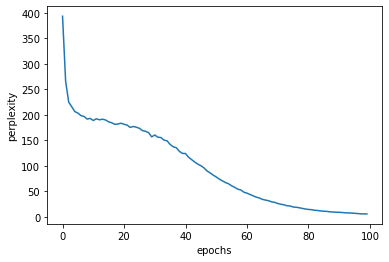

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb


# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 미니배치의 각 샘플의 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 취득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1

        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count += 1

    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    
    if (epoch+1) % 10 == 0:
        print('| 에폭 %d | 퍼플렉서티 %.2f'
              % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()

##### 5.5.4 RNNLM의 Trainer 클래스

RNNLM 학습을 수행하는 RNNlmTrainer 클래스

| 에폭 1 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 418.76
| 에폭 2 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 357.47
| 에폭 3 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 250.24
| 에폭 4 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 218.08
| 에폭 5 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 208.94
| 에폭 6 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 206.90
| 에폭 7 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 199.01
| 에폭 8 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 200.37
| 에폭 9 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 195.40
| 에폭 10 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.08
| 에폭 11 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 192.28
| 에폭 12 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 188.03
| 에폭 13 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 191.38
| 에폭 14 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 187.10
| 에폭 15 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 185.38
| 에폭 16 |  반복 1 / 19 | 시간 0[s] | 퍼플렉서티 189.60
| 에폭 17 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 187.05
| 에폭 18 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 183.77
| 에폭 19 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 181.07
| 에폭 20 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 180.29
| 에폭 21 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 178.03
| 에폭 22 |  반복 1 / 19 | 시간 1[s] | 퍼플렉서티 177.

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

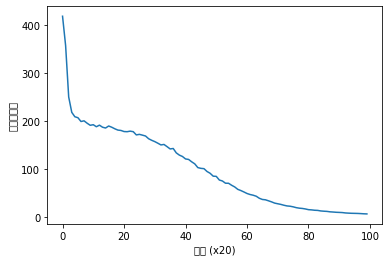

In [58]:
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from dataset import ptb

# 하이퍼 파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 5      # RNN을 펼치는 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000  # 테스트 데이터셋을 작게 설정
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
xs = corpus[:-1]  #입력
ts = corpus[1:]   #출력(정답 레이블)

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

trainer.fit(xs, ts, max_epoch, batch_size, time_size) # 학습 수행
# 1. 미니배치를 '순차적'으로 만들어
# 2. 모델의 순전파와 역전파를 호출하고
# 3. 옵티마이저로 가중치를 갱신하고
# 4. 퍼플렉시티를 구한다.

trainer.plot()